# Imporing Libraries

In [85]:
# Data Visualization
import matplotlib.pyplot as plt

# Data Processing
import pandas as pd

# NLP 
import re

# Others
import os
from collections import defaultdict

# Processing and Preparing Data

In [86]:
def string_processing(answer):
    pattern = '(?<! )(?=[!\"#$%&\'()\*\+,-\.:;=?@\[\]\\^_`\|\{\}~])|(?<=[!\"#$%&\'()\*\+,-\.:;=?@\[\]\\^_`\|\{\}~])(?! )'
    answer = re.sub(pattern, r' ',  answer)
    return answer

## Processing Crawled Data from CounselChat.com

In [87]:
path = "../data/CouncilChat-CrawledData/"
files = os.listdir(path)
files_xls = [f for f in files if f[-4:] == 'xlsx']
list_df = []
temp = []

for index, filename in enumerate(files_xls):
    try: 
        list_df.append(pd.read_excel(path+filename))
        temp.append(filename.split(".")[0])
    except:
        temp.append()

df_crawled = pd.concat(list_df)

In [88]:
df_crawled.dropna(inplace = True)

In [89]:
df_crawled.head()

,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistName,therapistTitle,therapistURL,answerText,upvotes,views
0,0,1,I just lost my grandpa,I just lost my grandpa and i'm having a rough ...,https://counselchat.com/questions/i-just-lost-...,grief-and-loss,Ian Palombo,#ThoughtMediator & #LifeUntangler,https://counselchat.com/therapists/ian-palombo,Feeling profound sadness after the death of a ...,0,92
1,1,1,I just lost my grandpa,I just lost my grandpa and i'm having a rough ...,https://counselchat.com/questions/i-just-lost-...,grief-and-loss,Dr. Melissa Valentina,Honor Yourself and Live Your Truth,https://counselchat.com/therapists/dr-melissa-...,If you connect with your therapist and can say...,0,16
2,2,1,I just lost my grandpa,I just lost my grandpa and i'm having a rough ...,https://counselchat.com/questions/i-just-lost-...,grief-and-loss,Dr. Timothy Paul,"'man'; Online - ""Natural Health Consultant and...",https://counselchat.com/therapists/dr-timothy-...,"Yknow, to see a man youve loved and care for p...",0,30
3,3,1,I just lost my grandpa,I just lost my grandpa and i'm having a rough ...,https://counselchat.com/questions/i-just-lost-...,grief-and-loss,Christina McGrath Fair,"""Enlightenment is when a wave realizes it is t...",https://counselchat.com/therapists/christina-m...,I am sorry for your loss. I understand the dif...,0,157
4,4,1,I just lost my grandpa,I just lost my grandpa and i'm having a rough ...,https://counselchat.com/questions/i-just-lost-...,grief-and-loss,Pamela Suraci,"Build on your strengths, grow in your challeng...",https://counselchat.com/therapists/pamela-suraci,"Losing someone you love, someone who has been ...",0,231


In [90]:
df_crawled.drop("Unnamed: 0", axis = 1, inplace = True)

In [91]:
df_crawled.shape

(12139, 11)

In [92]:
df_crawled.shape

(12139, 11)

In [93]:
df_crawled.topic.nunique()

33

In [94]:
df_crawled = df_crawled[["questionTitle","questionText","questionLink","topic","answerText","upvotes","views"]]

In [95]:
df_crawled["questionText"] = df_crawled["questionTitle"] + " " + df_crawled["questionText"]

In [96]:
df_crawled = df_crawled.reset_index()
df_crawled = df_crawled.drop(['index'], axis = 1)

## Preprocessing Kaggle Data

In [97]:
df_kaggle = pd.read_csv('/Users/kaushik-shakkari/Downloads/Psych_data.csv')

In [98]:
df_kaggle.Answer = df_kaggle.Answer.astype(str)
df_kaggle.Question = df_kaggle.Question.astype(str)

In [99]:
if 'Unnamed: 0' in df_kaggle.columns:
    df_kaggle.drop(['Unnamed: 0'], inplace = True, axis = 1)

In [100]:
(df_kaggle.Question.str.find("?") != -1).value_counts()

False    3788
True     1530
Name: Question, dtype: int64

In [101]:
question_df = df_kaggle[df_kaggle.Question.str.find("?") != -1]

In [102]:
question_df = question_df.reset_index()
question_df.drop(['index'], axis = 1, inplace = True)

In [103]:
question_df.head()

,Answer,Question,Therapist,time
0,It’s impossible to give a diagnosis over the i...,I don’t even really know where to start. For t...,7,2019-09-14
1,Congratulations on bringing your new baby into...,"From a woman in the UK: Hi, I have a 4 month o...",2,2019-09-16
2,Just by writing to us you have begun to make t...,Hello! I would like to know some exercises or ...,0,2019-09-6
3,Incest involves sexual relationships between p...,Me and my older brother have always been close...,7,2019-09-19
4,"Thank you for writing. In my opinion, this is ...",From a young woman in the U.S.: I have had eno...,2,2019-09-11


In [104]:
question_df.Question = question_df.Question.apply(string_processing)

In [105]:
question_df.shape

(1530, 4)

In [106]:
question_df.rename(columns={'Question': 'questionText','Answer':'answerText'}, inplace=True)

In [107]:
def findLastIndex(strn): 
    li_strn = strn.split()
    index = -1
    for i in range(0, len(li_strn)): 
        if li_strn[i] == '?': 
            index = i 
    return index, li_strn, len(li_strn)

In [108]:
question_df.questionTitle = ""

In [109]:
for i in range(question_df.shape[0]):
    #if i == 834:
    
    question_df.loc[i,"questionText"] = re.sub('\?\?+','?',question_df.loc[i,"questionText"])

    li = re.findall('(?<=\.|\?)[^\.]+?\?', question_df.loc[i,"questionText"])

    if li == []:
        li1 = re.findall('.*\?', question_df.loc[i,"questionText"])
        li1.sort(key = lambda x:len(x))
        ques = li1[-1]
    else:
        li.sort(key = lambda x:len(x))
        ques = li[-1]
    question_df.loc[i,"questionTitle"] = ques.strip()
    #print ("questionTitle" ,ques)
    index, li_qt, context_len = findLastIndex(question_df.loc[i,"questionText"])

    pre_ques_len =  index 
    post_ques_len = context_len - index 
    #print ("pre: ", pre_ques_len)
    #print ("post: ", post_ques_len)

    if pre_ques_len > 300 and post_ques_len > 200:
        qt = ' '.join(li_qt[index-300:index] + li_qt[index:index+200])
    elif pre_ques_len > 300:
        if index-300-200+post_ques_len < 0:
            indx = 0
        else:
            indx = index-300-200+post_ques_len
        qt = ' '.join(li_qt[indx:index] + li_qt[index:index+post_ques_len])
    elif post_ques_len > 200:
        qt = ' '.join(li_qt[index-pre_ques_len:index] + li_qt[index:index+200+300-pre_ques_len])
    else:
        qt = ' '.join(li_qt)
    #print ("question text: ", qt)
    question_df.loc[i,"questionText"] = qt
    

In [110]:
question_df.sample()

,answerText,questionText,Therapist,time,questionTitle
612,I’m sorry that you have had such difficulties...,Our son is 27 years old . He has had a rocky c...,5,2018-05-8,Any suggestions ?


## Generating Root Topics, Multilabels for Questions

In [111]:
di = defaultdict(set)

for i in range(df_crawled.shape[0]):
    if str(df_crawled.loc[i,"topic"]) in ["relationships","intimacy","family-conflict","parenting","relationship-dissolution","marriage","domestic-violence"]:
        df_crawled.loc[i,"root_topic"] = "family_conflicts"
    elif df_crawled.loc[i,"topic"] in ["depression","anxiety","stress","anger-management","trauma"]:
        df_crawled.loc[i,"root_topic"] = "emotional_conflicts"
    else:
        df_crawled.loc[i,"root_topic"] = "others"
    
    di[df_crawled.loc[i,"questionTitle"]].add(df_crawled.loc[i,"root_topic"])


In [112]:
df_crawled.sort_values(by=['upvotes','views'], ascending=False, inplace = True)

In [113]:
df_crawled.drop_duplicates(subset=['questionTitle','topic'], keep="first",inplace = True)
df_crawled = df_crawled.reset_index()
df_crawled = df_crawled.drop("index", axis = 1)

In [114]:
df_crawled.shape

(1425, 8)

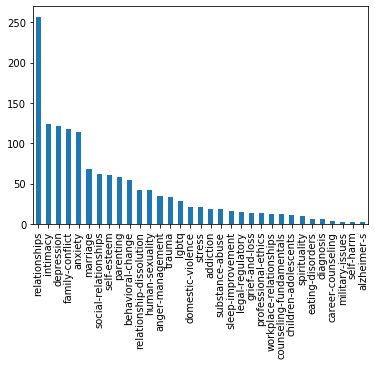

In [115]:
df_crawled.topic.value_counts().apply(lambda x:x).plot(kind='bar')

In [118]:
labels = []
for i in range(df_crawled.shape[0]):
    topics = list(di[df_crawled.loc[i,"questionTitle"]])
    label = [0,0,0]
    for topic in topics:
        if topic == 'family_conflicts':
            label[0] = 1
        if topic == 'emotional_conflicts':
            label[1] = 1
        if topic == 'others':
            label[2] = 1
    labels.append(label)

df_crawled["root_multi_label"] = pd.Series(labels, dtype = object)

## Combining Kaggle Data with CouncilChat Data

In [119]:
final_df = pd.concat([df_crawled[["questionTitle","questionText","answerText"]], question_df[["questionTitle","questionText","answerText"]]])

In [120]:
final_df = final_df.reset_index()
final_df = final_df.drop("index", axis = 1)

In [121]:
final_df.shape

(2337, 3)

# Generating Good Reflections from Therapists Answers

In [122]:
final_df.answerText = final_df.answerText.apply(string_processing)

In [123]:
for i in range(final_df.shape[0]):
    # extract if a sentence in answer has sounds like or seems like
    if re.findall(r"([^.]*?(sounds like|seems like)[^.]*\.)",final_df.loc[i,"answerText"]):
        final_df.loc[i,"reflection"] = re.findall(r"([^.]*?(sounds like|seems like)[^.]*\.)",final_df.loc[i,"answerText"])[0][0] 
    # check if answer contains atleast 2 senetences, extract the second sentence if the first sentence is shorter (for example if "hello" is the first sentence) 
    # check oif hello or thank you is present in first sentence, then extract second sentence
    elif (
        (len(final_df.loc[i,"answerText"].split(".")[0].split()) <= 2 and len(final_df.loc[i,"answerText"].split(".")) >= 2)
        or (("hello" in final_df.loc[i,"answerText"].split(".")[0].lower() or "hi" in final_df.loc[i,"answerText"].split(".")[0].lower() or "thank you" in final_df.loc[i,"answerText"].split(".")[0].lower()) and len(final_df.loc[i,"answerText"].split(".")) >= 2)):
        final_df.loc[i,"reflection"] = final_df.loc[i,"answerText"].split(".")[1].strip()
    # else just extract the first sentence as reflection
    else:
        final_df.loc[i,"reflection"] = final_df.loc[i,"answerText"].split(".")[0].strip()

# Saving the Preprocessed Dataset in the Data Folder

In [124]:
final_df.to_pickle("../data/preprocessed_dataset")